In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import timeit
import json
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline
pd.set_option('display.max_columns', 500)



In [6]:
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# from sklearn.externals.six import StringIO  


In [7]:
main_df = pd.read_csv('main_df.csv')

In [8]:
main_df.head(1)

,project_id,outcome_state,final_usd_pledged,final_backers_count,project_name,project_description,live_state,in_mid_duration_range,usd_goal,usd_pledged,currency,launched_at,deadline,staff_pick,country,main_category,duration,days_from_launch,backers_count,project_link,creator_link,pledged_to_goal_ratio,description_len
0,464921389,successful,5660.0,40,Good Fishermen Know A Lot About Sex,A musical dramedy about family and dealing wit...,live,True,5000.0,1575.0,USD,08-21-2019,10-11-2019,False,US,Theater,50,21,24,https://www.kickstarter.com/projects/213094288...,https://www.kickstarter.com/profile/2130942887,0.315,58


In [16]:
# Lists of features to use and to drop from main_df
model_cols = ['usd_goal', 'pledged_to_goal_ratio', 'duration', 'staff_pick',
              'country', 'main_category', 'backers_count', 'description_len', 'outcome_state']
continuous_cols = ['usd_goal', 'duration', 'backers_count', 'pledged_to_goal_ratio', 'description_len']
binary_cat_cols = ['outcome_state', 'staff_pick']
categorical_cols = ['country', 'main_category']

drop_cols = list(set(main_df.columns.to_list()) - set(model_cols))
print(drop_cols)

['live_state', 'launched_at', 'in_mid_duration_range', 'project_name', 'final_usd_pledged', 'final_backers_count', 'project_description', 'deadline', 'project_id', 'creator_link', 'project_link', 'usd_pledged', 'currency', 'days_from_launch']


In [17]:
# create model_df 
model_df = main_df.drop(drop_cols, axis=1)
model_df.head(1)

,outcome_state,usd_goal,staff_pick,country,main_category,duration,backers_count,pledged_to_goal_ratio,description_len
0,successful,5000.0,False,US,Theater,50,24,0.315,58


In [18]:
# encode binary variables 
model_df['outcome_state'] = model_df['outcome_state'].map({'successful': 1, 'failed': 0})
model_df['staff_pick'] = model_df['staff_pick'].astype(int)
model_df.head(3)

,outcome_state,usd_goal,staff_pick,country,main_category,duration,backers_count,pledged_to_goal_ratio,description_len
0,1,5000.0,0,US,Theater,50,24,0.31500,58
1,0,1000.0,0,US,Crafts,45,2,0.00600,117
2,0,25000.0,0,US,Film & Video,45,2,0.00008,78


In [20]:
cont_df = model_df.drop(['country','main_category', 'outcome_state', 'staff_pick'], axis=1)
cat_df = model_df[['country','main_category']]

In [23]:
ohe = preprocessing.OneHotEncoder()
ohe.fit(cat_df)
X_cat_ohe = ohe.transform(cat_df)

In [26]:
X_cat_ohe

<4161x37 sparse matrix of type '<class 'numpy.float64'>'
	with 8322 stored elements in Compressed Sparse Row format>

In [ ]:
country	main_category

In [30]:
# X_cont = model_df.loc[:,continuous_cols]
# X_cat = model_df.loc[:,categorical_cols]
X = model_df.drop('outcome_state', axis=1)
y = model_df.loc[:, 'outcome_state']
print(f'X:{X}')
print(f'y:{y}')

X:         usd_goal  staff_pick country main_category  duration  backers_count  \
0       5000.0000           0      US       Theater        50             24   
1       1000.0000           0      US        Crafts        45              2   
2      25000.0000           0      US  Film & Video        45              2   
3       7000.0000           0      US    Technology        30              1   
4      45000.0000           0      US          Food        34             14   
...           ...         ...     ...           ...       ...            ...   
4156  105000.0000           0      US    Technology        30              5   
4157    1033.0000           0      US    Publishing        30              1   
4158   15000.0000           0      US  Film & Video        37              0   
4159    7000.0000           0      US    Technology        30              0   
4160   36913.4907           1      GB  Film & Video        30            205   

      pledged_to_goal_ratio  descript

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=100)


In [33]:
tree_classifier_reg = DecisionTreeClassifier()  
tree_classifier_reg.fit(X_train, y_train)

ValueError: could not convert string to float: 'GB'

In [43]:
# Function to dummy the publishers
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [44]:
categorical_cols

['staff_pick', 'country', 'main_category']

In [45]:
X = model_df.drop('outcome_state', axis=1)
y = model_df.loc[:, 'outcome_state']

,outcome_state,usd_goal,staff_pick,country,main_category,duration,backers_count,pledged_to_goal_ratio,description_len
0,1,5000.0000,0,US,Theater,50,24,0.315000,58
1,0,1000.0000,0,US,Crafts,45,2,0.006000,117
2,0,25000.0000,0,US,Film & Video,45,2,0.000080,78
3,0,7000.0000,0,US,Technology,30,1,0.000143,120
4,0,45000.0000,0,US,Food,34,14,0.042356,122
...,...,...,...,...,...,...,...,...,...
4156,0,105000.0000,0,US,Technology,30,5,0.001352,94
4157,0,1033.0000,0,US,Publishing,30,1,0.010000,127
4158,0,15000.0000,0,US,Film & Video,37,0,0.000000,125
4159,0,7000.0000,0,US,Technology,30,0,0.000000,132


In [47]:
dummy_model_df = dummy_df(model_df, ['country', 'main_category'])

In [49]:
X = dummy_model_df.drop('outcome_state', axis=1)
y = dummy_model_df.loc[:, 'outcome_state']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=60)


In [54]:
tree_classifier = DecisionTreeClassifier()  
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[[240  31]
 [ 35 527]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       271
           1       0.94      0.94      0.94       562

    accuracy                           0.92       833
   macro avg       0.91      0.91      0.91       833
weighted avg       0.92      0.92      0.92       833



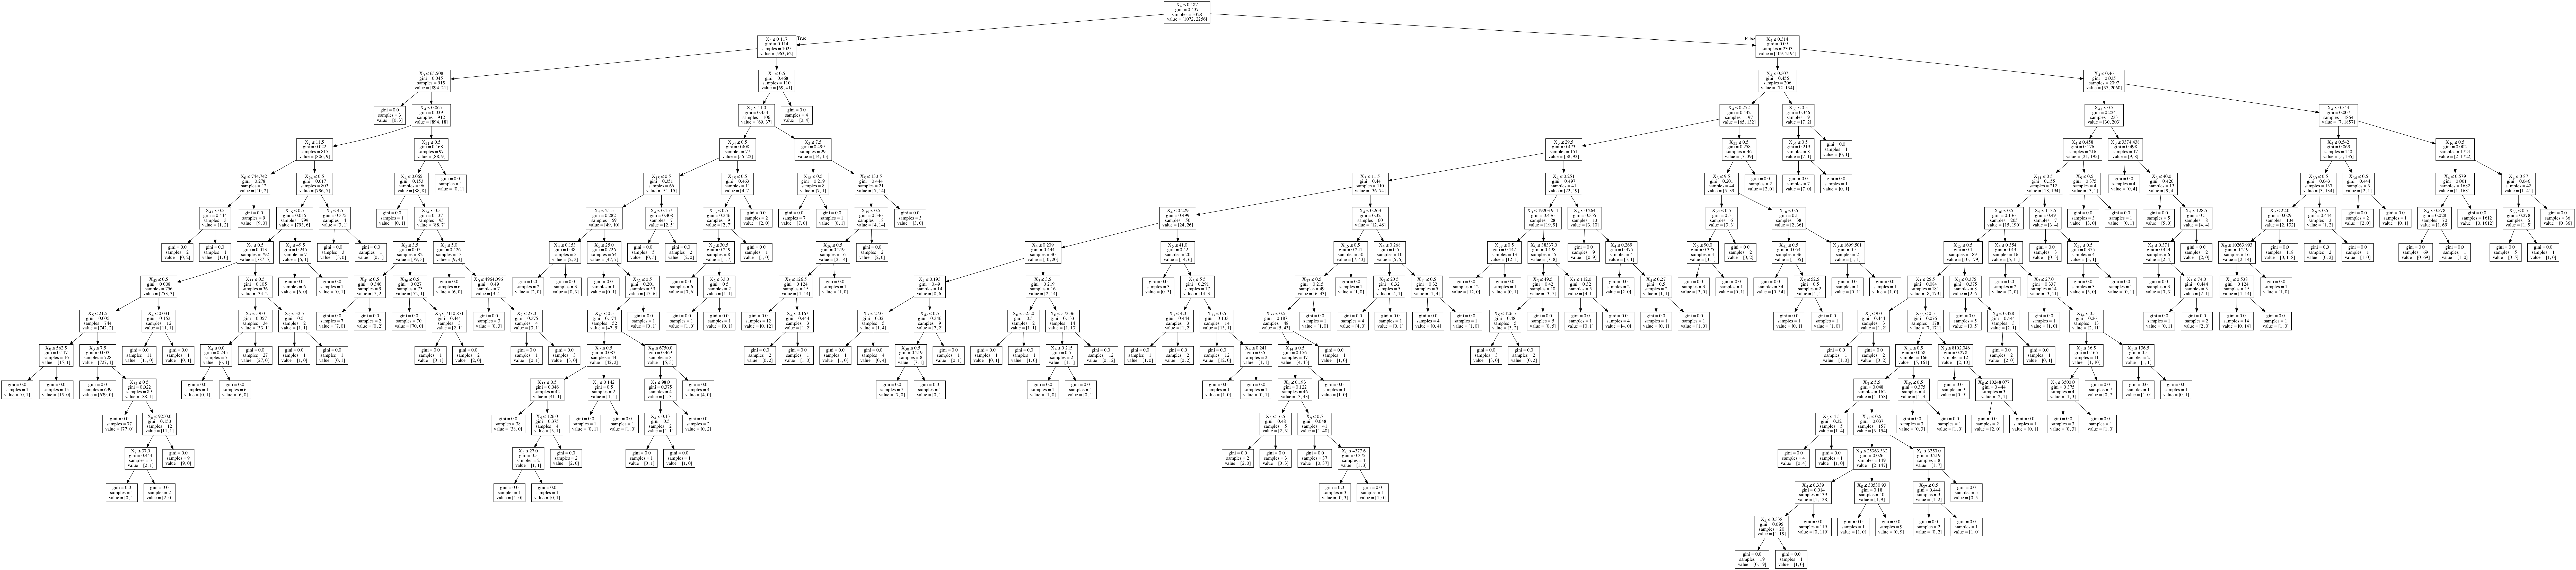

In [55]:
# visualizing the classifier tree
tree_classifier_pred = tree_classifier.predict(X_test)
print(confusion_matrix(y_test, tree_classifier_pred))
print(classification_report(y_test, tree_classifier_pred))


dot_data = StringIO()
export_graphviz(tree_classifier_reg, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[0.9461664116343625, 0.9461664116343625, 0.9432858342612287, 0.9440052503872712, 0.945210646126287, 0.9418516053700134, 0.9408871790426788, 0.9377644848903083, 0.936560244853237]


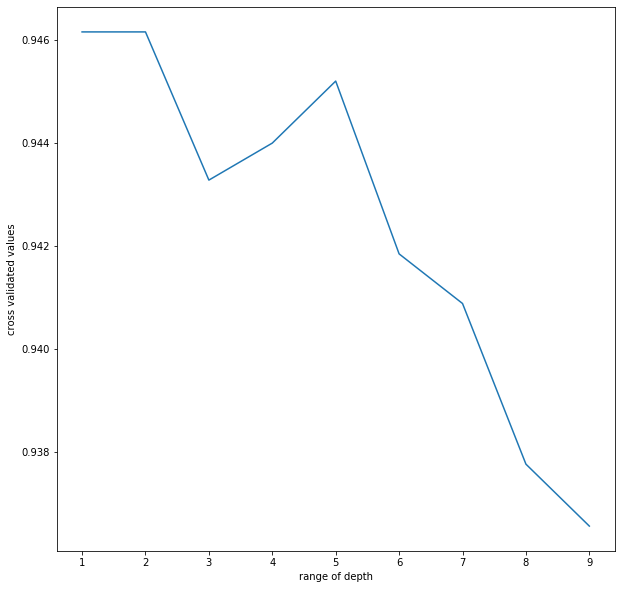

In [56]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(tree_classifier, X, y, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X, y, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

In [13]:
ohe = preprocessing.OneHotEncoder()
ohe.fit(X_cat)
X_cat_ohe = ohe.transform(X_cat).toarray()
print(f'X_cat_ohe:{X_cat_ohe}')

X_cat_ohe:[[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [14]:
scaler = StandardScaler()
X_cont_scaled = scaler.fit_transform(X_cont)
print(f'X_cont_scaled:{X_cont_scaled}')

print(f'X_cont:{X_cont}')
print(f'X_cat:{X_cat}')
print(f'y:{y}')

X_cont_scaled:[[-0.105736    1.32222638 -0.1494938  -0.02681496 -1.11841404]
 [-0.13662405  0.93237731 -0.18118017 -0.02786309  0.59658436]
 [ 0.04870429  0.93237731 -0.18118017 -0.02788317 -0.53705865]
 ...
 [-0.02851586  0.3086188  -0.18406075 -0.02788344  0.82912651]
 [-0.09029197 -0.23716989 -0.18406075 -0.02788344  1.0326009 ]
 [ 0.14070043 -0.23716989  0.11119858 -0.02672756  0.82912651]]
X_cont:         usd_goal  duration  backers_count  pledged_to_goal_ratio  \
0       5000.0000        50             24               0.315000   
1       1000.0000        45              2               0.006000   
2      25000.0000        45              2               0.000080   
3       7000.0000        30              1               0.000143   
4      45000.0000        34             14               0.042356   
...           ...       ...            ...                    ...   
4156  105000.0000        30              5               0.001352   
4157    1033.0000        30              1 

In [15]:
X_scaled = np.concatenate((X_cont_scaled, X_cat_ohe), axis=1)
print(f'X_scaled:{X_scaled}')

print(f'X_cont:{X_cont}')
print(f'X_cat:{X_cat}')
print(f'y:{y}')

X_scaled:[[-0.105736    1.32222638 -0.1494938  ...  0.          0.
   1.        ]
 [-0.13662405  0.93237731 -0.18118017 ...  0.          0.
   0.        ]
 [ 0.04870429  0.93237731 -0.18118017 ...  0.          0.
   0.        ]
 ...
 [-0.02851586  0.3086188  -0.18406075 ...  0.          0.
   0.        ]
 [-0.09029197 -0.23716989 -0.18406075 ...  0.          1.
   0.        ]
 [ 0.14070043 -0.23716989  0.11119858 ...  0.          0.
   0.        ]]
X_cont:         usd_goal  duration  backers_count  pledged_to_goal_ratio  \
0       5000.0000        50             24               0.315000   
1       1000.0000        45              2               0.006000   
2      25000.0000        45              2               0.000080   
3       7000.0000        30              1               0.000143   
4      45000.0000        34             14               0.042356   
...           ...       ...            ...                    ...   
4156  105000.0000        30              5               

In [ ]:
# make pred y and features X in diffrent transformations
X_cont = model_df.loc[:,continuous_cols]
X_cat = model_df.loc[:,categorical_cols]
y = model_df.loc[:, 'outcome_state']

ohe = preprocessing.OneHotEncoder()
ohe.fit(X_cat)
X_cat_ohe = ohe.transform(X_cat).toarray()

scaler = StandardScaler()
X_cont_scaled = scaler.fit_transform(X_cont)

scale = MinMaxScaler()
X_cont_minmax = scale.fit_transform(X_cont)

X_minmax = np.concatenate((X_cont_minmax, X_cat_ohe), axis=1)
X_scaled = np.concatenate((X_cont_scaled, X_cat_ohe), axis=1)
X_reg = np.concatenate((X_cont, X_cat_ohe), axis=1)

In [18]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size =0.2, random_state=10)
print(f'X_train_scaled:{X_train_scaled.shape}{X_train_scaled}')
print(f'X_test_scaled:{X_test_scaled.shape}{X_test_scaled}')
print(f'y_train:{y_train.shape}{y_train}')
print(f'y_test:{y_test.shape}{y_test}')
print(f'X_scaled:{X_scaled}')


print(f'X_cont:{X_cont}')
print(f'X_cat:{X_cat}')
print(f'y:{y}')

X_train_scaled:(3328, 44)[[-0.13430745 -1.79656616 -0.15237438 ...  0.          0.
   0.        ]
 [-0.13922469 -0.23716989 -0.15669525 ...  0.          0.
   0.        ]
 [-0.14341943 -1.4067171  -0.11636715 ...  1.          0.
   0.        ]
 ...
 [ 5.6471646  -1.48468691 -0.18262046 ...  0.          0.
   0.        ]
 [ 0.08731436  2.10192451 -0.12356859 ...  0.          1.
   0.        ]
 [ 0.04870429 -0.23716989  0.07087048 ...  1.          0.
   0.        ]]
X_test_scaled:(833, 44)[[-1.28902040e-01 -2.37169894e-01 -1.82620460e-01 ...  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.43187766e-01 -1.79656616e+00 -1.63896698e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.20409930e-02 -2.37169894e-01 -1.69657855e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.84657250e+01  2.10192451e+00 -1.66777276e-01 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [-1.26832318e-01 -4.71079335e-01 -1.50934093e-01 ...  1.00000000e+00
   0.00000000

In [ ]:
# train-test split each
X_train_reg, X_test_reg, y_train, y_test = train_test_split(X_reg, y, test_size =0.2, random_state=10)
X_train_minmax, X_test_minmax, y_train, y_test = train_test_split(X_minmax, y, test_size =0.2, random_state=10)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size =0.2, random_state=10)

#### Tree Classifiers for each type of standardization, GINI

In [ ]:
tree_classifier_reg = DecisionTreeClassifier()  
tree_classifier_reg.fit(X_train_reg, y_train)

In [ ]:
tree_classifier_minmax = DecisionTreeClassifier()  
tree_classifier_minmax.fit(X_train_minmax, y_train)

In [19]:
tree_classifier_scaled = DecisionTreeClassifier()  
tree_classifier_scaled.fit(X_train_scaled, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
# visualizing the classifier tree
tree_classifier_reg_pred = tree_classifier_reg.predict(X_test_reg)
print(confusion_matrix(y_test, tree_classifier_reg_pred))
print(classification_report(y_test, tree_classifier_reg_pred))


dot_data = StringIO()
export_graphviz(tree_classifier_reg, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# visualizing the classifier tree
tree_classifier_minmax_pred = tree_classifier_minmax.predict(X_test_minmax)
print(confusion_matrix(y_test, tree_classifier_minmax_pred))
print(classification_report(y_test, tree_classifier_minmax_pred))


dot_data = StringIO()
export_graphviz(tree_classifier_minmax, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[[228  43]
 [ 30 532]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       271
           1       0.93      0.95      0.94       562

    accuracy                           0.91       833
   macro avg       0.90      0.89      0.90       833
weighted avg       0.91      0.91      0.91       833



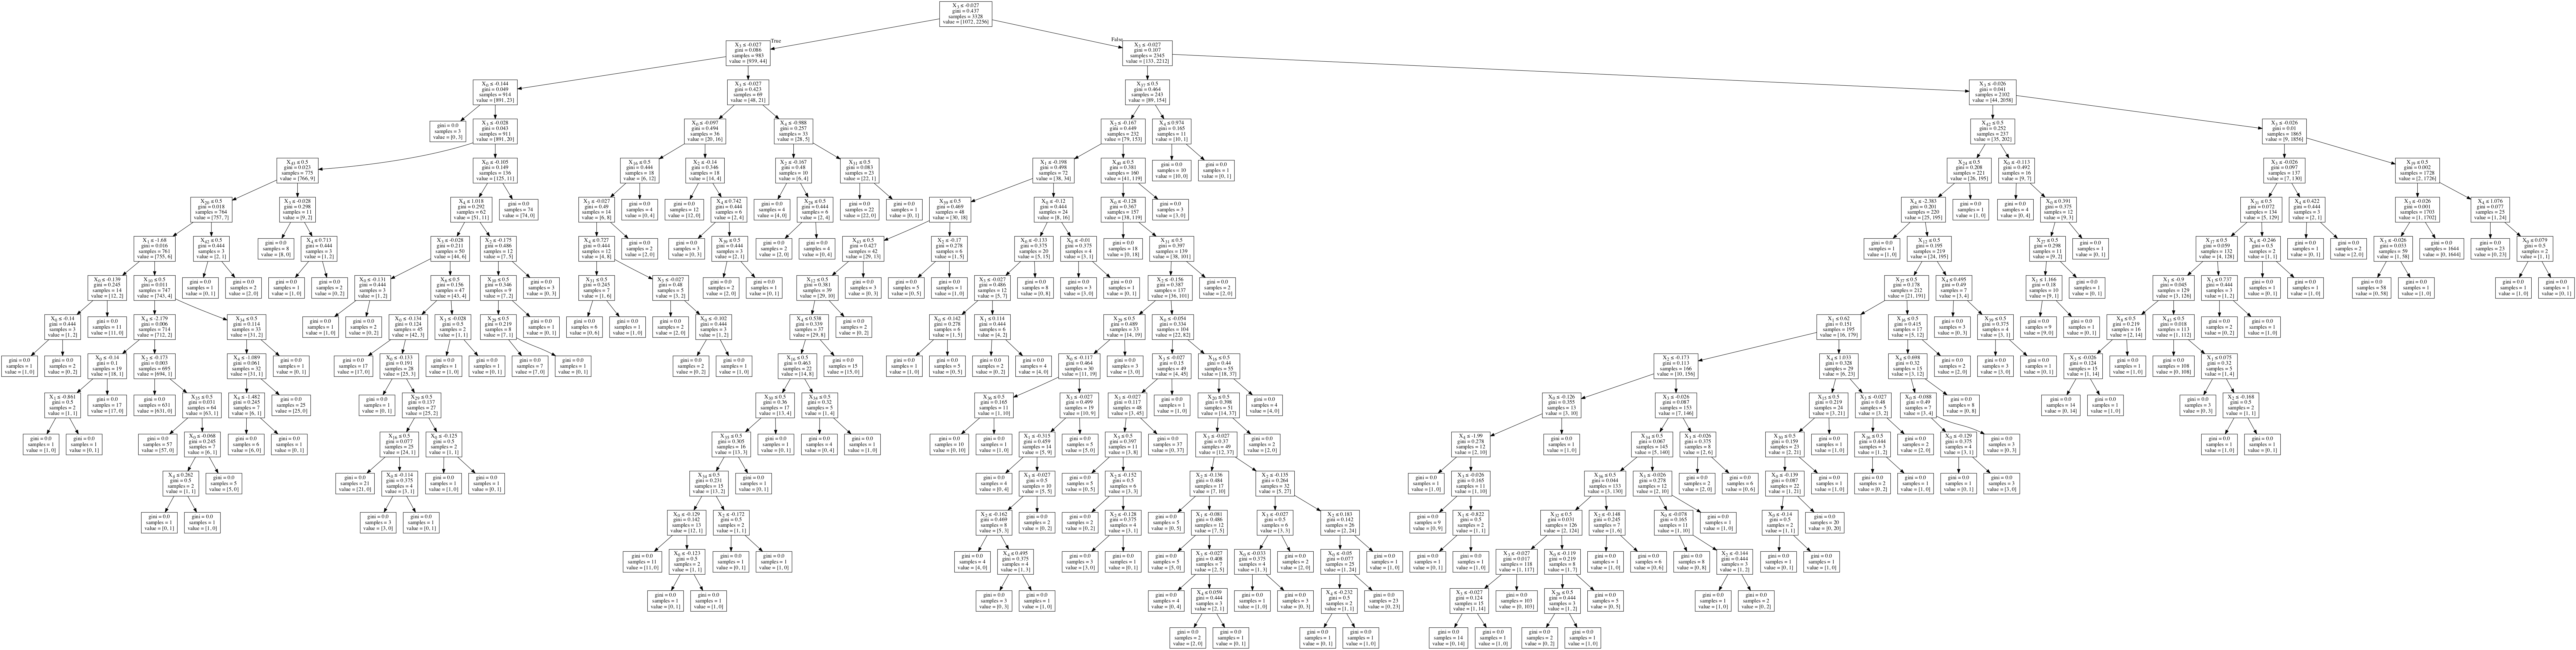

In [20]:
# visualizing the classifier tree
tree_classifier_scaled_pred = tree_classifier_scaled.predict(X_test_scaled)
print(confusion_matrix(y_test, tree_classifier_scaled_pred))
print(classification_report(y_test, tree_classifier_scaled_pred))


dot_data = StringIO()
export_graphviz(tree_classifier_scaled, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Tree Classifiers for each type of standardization, GINI, max_depth=5

In [ ]:
tree_classifier_reg = DecisionTreeClassifier(max_depth=5)  
tree_classifier_reg.fit(X_train_reg, y_train)

In [ ]:
tree_classifier_minmax = DecisionTreeClassifier(max_depth=5)  
tree_classifier_minmax.fit(X_train_minmax, y_train)

In [ ]:
tree_classifier_scaled = DecisionTreeClassifier(max_depth=5)  
tree_classifier_scaled.fit(X_train_scaled, y_train)


In [ ]:
# visualizing the classifier tree
tree_classifier_reg_pred = tree_classifier_reg.predict(X_test_reg)
print(confusion_matrix(y_test, tree_classifier_reg_pred))
print(classification_report(y_test, tree_classifier_reg_pred))

dot_data = StringIO()
export_graphviz(tree_classifier_reg, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# visualizing the classifier tree
tree_classifier_minmax_pred = tree_classifier_minmax.predict(X_test_minmax)
print(confusion_matrix(y_test, tree_classifier_minmax_pred))
print(classification_report(y_test, tree_classifier_minmax_pred))


dot_data = StringIO()
export_graphviz(tree_classifier_minmax, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# visualizing the classifier tree
tree_classifier_scaled_pred = tree_classifier_scaled.predict(X_test_scaled)
print(confusion_matrix(y_test, tree_classifier_scaled_pred))
print(classification_report(y_test, tree_classifier_scaled_pred))


dot_data = StringIO()
export_graphviz(tree_classifier_scaled, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Tree Classifiers for each type of standardization, GINI, max_depth=2

In [ ]:
tree_classifier_reg = DecisionTreeClassifier(max_depth=2)  
tree_classifier_reg.fit(X_train_reg, y_train)

In [ ]:
tree_classifier_minmax = DecisionTreeClassifier(max_depth=2)  
tree_classifier_minmax.fit(X_train_minmax, y_train)

In [23]:
tree_classifier_scaled_2 = DecisionTreeClassifier(max_depth=1)  
tree_classifier_scaled_2.fit(X_train_scaled, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
# visualizing the classifier tree
tree_classifier_reg_pred = tree_classifier_reg.predict(X_test_reg)
print(confusion_matrix(y_test, tree_classifier_reg_pred))
print(classification_report(y_test, tree_classifier_reg_pred))

dot_data = StringIO()
export_graphviz(tree_classifier_reg, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# visualizing the classifier tree
tree_classifier_minmax_pred = tree_classifier_minmax.predict(X_test_minmax)
print(confusion_matrix(y_test, tree_classifier_minmax_pred))
print(classification_report(y_test, tree_classifier_minmax_pred))


dot_data = StringIO()
export_graphviz(tree_classifier_minmax, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[[242  29]
 [  9 553]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       271
           1       0.95      0.98      0.97       562

    accuracy                           0.95       833
   macro avg       0.96      0.94      0.95       833
weighted avg       0.95      0.95      0.95       833



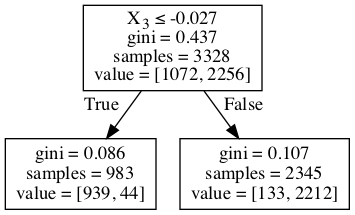

In [24]:
# visualizing the classifier tree
tree_classifier_scaled_pred = tree_classifier_scaled_2.predict(X_test_scaled)
print(confusion_matrix(y_test, tree_classifier_scaled_pred))
print(classification_report(y_test, tree_classifier_scaled_pred))


dot_data = StringIO()
export_graphviz(tree_classifier_scaled_2, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

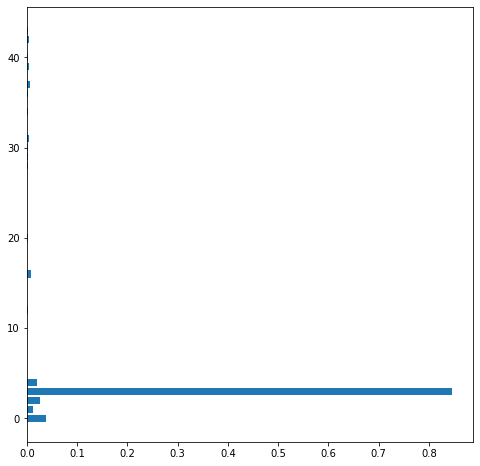

In [27]:
def plot_feature_importances(model):
    n_features = X_train_scaled.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_scaled.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_classifier_scaled)

#### Tree Classifiers for each type of standardization, Entropy, max_depth=2

In [ ]:
tree_classifier_reg = DecisionTreeClassifier(criterion='entropy', max_depth=2)  
tree_classifier_reg.fit(X_train_reg, y_train)

In [ ]:
tree_classifier_minmax = DecisionTreeClassifier(criterion='entropy', max_depth=2)  
tree_classifier_minmax.fit(X_train_minmax, y_train)

In [ ]:
tree_classifier_scaled = DecisionTreeClassifier(criterion='entropy', max_depth=2)  
tree_classifier_scaled.fit(X_train_scaled, y_train)


In [ ]:
# visualizing the classifier tree
tree_classifier_reg_pred = tree_classifier_reg.predict(X_test_reg)
print(confusion_matrix(y_test, tree_classifier_reg_pred))
print(classification_report(y_test, tree_classifier_reg_pred))

dot_data = StringIO()
export_graphviz(tree_classifier_reg, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# visualizing the classifier tree
tree_classifier_minmax_pred = tree_classifier_minmax.predict(X_test_minmax)
print(confusion_matrix(y_test, tree_classifier_minmax_pred))
print(classification_report(y_test, tree_classifier_minmax_pred))


dot_data = StringIO()
export_graphviz(tree_classifier_minmax, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# visualizing the classifier tree
tree_classifier_scaled_pred = tree_classifier_scaled.predict(X_test_scaled)
print(confusion_matrix(y_test, tree_classifier_scaled_pred))
print(classification_report(y_test, tree_classifier_scaled_pred))


dot_data = StringIO()
export_graphviz(tree_classifier_scaled, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())